## Google Mobility Report during Covid19 outbreak

In [16]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [17]:
df = pd.read_csv('D:\Data Science\Databases\Global_Mobility_Report.csv', low_memory=False)
df.head(5)

,country_region_code,country_region,sub_region_1,sub_region_2,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


In [18]:
df['date'] = df['date'].str.replace('2020-02','feb')

In [19]:
df['date'] = df['date'].str.replace('2020-03','mar')

In [20]:
df['date'] = df['date'].str.replace('2020-04','apr')

In [21]:
df['date'] = df['date'].str.replace('2020-05','may')

In [22]:
df['date'] = df['date'].str.replace('2020-06','jun')

### Istanbul Transit Stations Percent Change from Baseline

In [23]:
df_ist = df[df.sub_region_1 == 'İstanbul']

In [38]:
df_ist.date.unique()

array(['feb-15', 'feb-16', 'feb-17', 'feb-18', 'feb-19', 'feb-20',
       'feb-21', 'feb-22', 'feb-23', 'feb-24', 'feb-25', 'feb-26',
       'feb-27', 'feb-28', 'feb-29', 'mar-01', 'mar-02', 'mar-03',
       'mar-04', 'mar-05', 'mar-06', 'mar-07', 'mar-08', 'mar-09',
       'mar-10', 'mar-11', 'mar-12', 'mar-13', 'mar-14', 'mar-15',
       'mar-16', 'mar-17', 'mar-18', 'mar-19', 'mar-20', 'mar-21',
       'mar-22', 'mar-23', 'mar-24', 'mar-25', 'mar-26', 'mar-27',
       'mar-28', 'mar-29', 'mar-30', 'mar-31', 'apr-01', 'apr-02',
       'apr-03', 'apr-04', 'apr-05', 'apr-06', 'apr-07', 'apr-08',
       'apr-09', 'apr-10', 'apr-11', 'apr-12', 'apr-13', 'apr-14',
       'apr-15', 'apr-16', 'apr-17', 'apr-18', 'apr-19', 'apr-20',
       'apr-21', 'apr-22', 'apr-23', 'apr-24', 'apr-25', 'apr-26',
       'apr-27', 'apr-28', 'apr-29', 'apr-30', 'may-01', 'may-02',
       'may-03', 'may-04', 'may-05', 'may-06', 'may-07', 'may-08',
       'may-09', 'may-10', 'may-11', 'may-12', 'may-13', 'may-

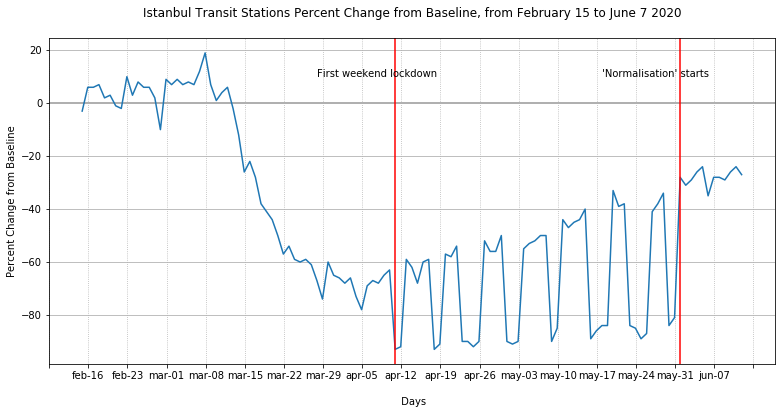

In [78]:
june_first = df_ist[df_ist.date == 'jun-01']

fig = plt.figure(figsize=(13,6))
ax = plt.subplot()

# gridlines and horizontal baseline
axes = plt.gca()
axes.yaxis.grid()
ax.get_ygridlines()[5].set_linewidth(2) #set 5th y-gridline's width to 2
ax.grid(axis='x', linestyle=':')

plt.plot(df_ist.date, df_ist.transit_stations_percent_change_from_baseline)

#set xticks every 15 days
start, end = ax.get_xlim()
x_ticks = ax.xaxis.set_ticks(np.arange(start, end, 7))

plt.title('Istanbul Transit Stations Percent Change from Baseline, from February 15 to June 7 2020\n')
plt.xlabel('\n Days')
plt.ylabel('Percent Change from Baseline')
plt.axvline(56, color='r')
plt.text(42.1,10,'First weekend lockdown')
plt.axvline(107, color='r')
plt.text(93, 10, '\'Normalisation\' starts')

plt.savefig('mob_report_ist.png')

### Greater London Transit Stations Percent Change from Baseline

In [67]:
df_lon = df[df.sub_region_1 == 'Greater London']

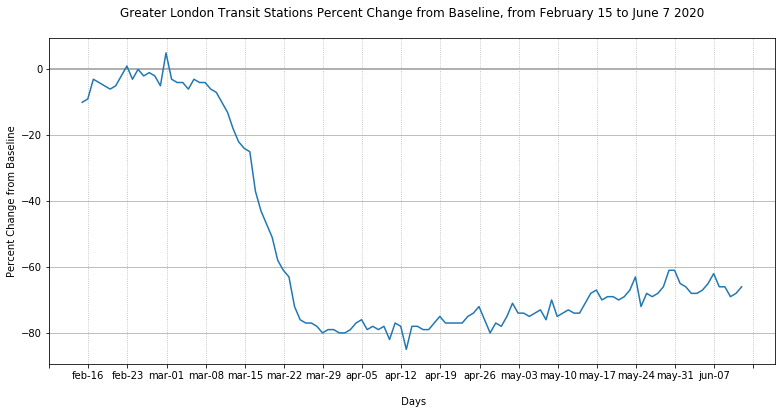

In [77]:
fig = plt.figure(figsize=(13,6))
ax1 = plt.subplot()

# horizontal gridlines and baseline
axes = plt.gca()
axes.yaxis.grid()
ax1.get_ygridlines()[5].set_linewidth(2)
ax1.grid(axis='x', linestyle=':')

plt.plot(df_lon.date, df_lon.transit_stations_percent_change_from_baseline)

#set xticks every 15 days
start, end = ax1.get_xlim()
ax1.xaxis.set_ticks(np.arange(start, end, 7))

plt.title('Greater London Transit Stations Percent Change from Baseline, from February 15 to June 7 2020\n')
plt.xlabel('\n Days')
plt.ylabel('Percent Change from Baseline')

plt.savefig('mob_report_lon.png')